In [33]:
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
def get_bytes(raw, bytes_cnt):
    int_repr = int(raw, 2)
    full_bits = bin(int_repr)[2:].zfill(8*bytes_cnt)
    return [
        int(full_bits[8*i:8*(i+1)], base=2)
        for i in range(bytes_cnt)]

In [4]:
def ds_read(nbits):
    bytes_cnt = nbits // 8
    
    # Unzip dataset
    with zipfile.ZipFile(f'Data/Lab 11/Base{nbits}.zip') as zip_ref:
        zip_ref.extractall(f'Data/Lab 11/Base{nbits}')

    # Read Dataset
    df = pd.read_csv(
        f'Data/Lab 11/Base{nbits}/Base{nbits}.txt', 
        sep=' ', names=['x', 'y'])
   
    # Split x into bytes
    df['x'] = df['x'].apply(
        lambda xi: get_bytes(str(xi), bytes_cnt))
    
    # Add x{i} features. X[i] - byte
    xs = [f'x{i}' for i in range(bytes_cnt)]
    df[xs] = pd.DataFrame(df['x'].values.tolist(), index= df.index)

    # Split DataFrame into train and test
    df_train, df_test = train_test_split(df, train_size=int(1e4))

    # Get x, y train np.arrays
    x_train = df_train[xs].values
    y_train = df_train['y'].values

    # Get x, y test np.arrays
    x_test = df_test[xs].values
    y_test = df_test['y'].values
    
    return {
        'df': (df, df_train, df_test),
        'x': (x_train, x_test),
        'y': (y_train, y_test),
    }

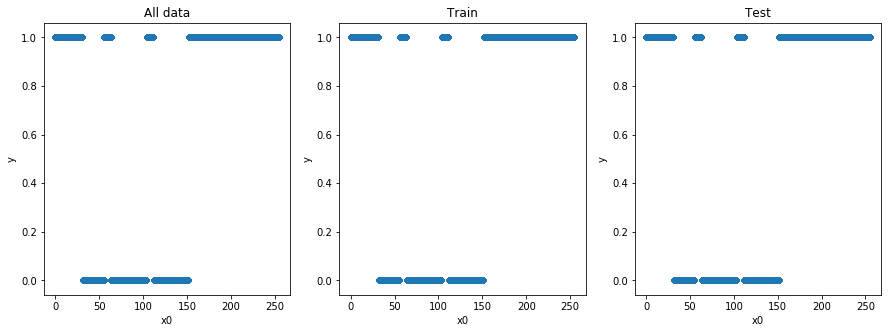

In [5]:
# Read 8 bit data 
data = ds_read(8)
df, df_train, df_test = data['df']
x_train, x_test = data['x']
y_train, y_test = data['y']

# Setup plots
_, ax = plt.subplots(1, 3, figsize=(15, 5))
for axi in ax:
    axi.set_xlabel('x')
    axi.set_ylabel('y')
ax[0].set_title('All data')
ax[1].set_title('Train')
ax[2].set_title('Test')

# Plot all, train, test data sets
df.plot.scatter(x='x0', y='y', ax=ax[0])
df_train.plot.scatter(x='x0', y='y', ax=ax[1])
df_test.plot.scatter(x='x0', y='y', ax=ax[2])

In [6]:
# LogisticRegression Model
clf_log_reg = LogisticRegression(solver='lbfgs')
clf_log_reg.fit(x_train, y_train)
print('LR: Train: ', (clf_log_reg.predict(x_train) == y_train).mean())
print('LR: Test', (clf_log_reg.predict(x_test) == y_test).mean())

# DecisionTree Model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
print('DT: ', (clf_tree.predict(x_train) == y_train).mean())
print('DT: ', (clf_tree.predict(x_test) == y_test).mean())

LR: Train:  0.6546
LR: Test 0.6487656565656565
DT:  1.0
DT:  1.0


In [10]:
# Read 16 bit data 
data = ds_read(16)
df, df_train, df_test = data['df']
x_train, x_test = data['x']
y_train, y_test = data['y']

# LogisticRegression Model
clf_log_reg = LogisticRegression(solver='lbfgs')
clf_log_reg.fit(x_train, y_train)
print('LR: ', (clf_log_reg.predict(x_train) == y_train).mean())
print('LR: ', (clf_log_reg.predict(x_test) == y_test).mean())

# DecisionTree Model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)
print('DT: ', (clf_tree.predict(x_train) == y_train).mean())
print('DT: ', (clf_tree.predict(x_test) == y_test).mean())

LR:  0.6056
LR:  0.6120464646464646
DT:  1.0
DT:  0.8889171717171718


In [20]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

0.8039171717171717

In [23]:
x_train

array([[140,  96],
       [153,   2],
       [ 36, 153],
       ...,
       [ 21,  13],
       [ 27, 152],
       [ 16, 181]])